In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers > /dev/null

In [ ]:
!ls 'drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data'

arguments_dev.csv	    arguments_train.csv		 legal
arguments_dev_encoded.csv   arguments_train_encoded.csv  Results95.csv
arguments_dev_encoded.pkl   arguments_train_encoded.pkl  Results99.csv
arguments_test.csv	    key_points_test.csv
arguments_test_encoded.pkl  labels_test.csv


In [ ]:
import json
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
random_state = 321

# Train/Dev/Test split

In [ ]:
legal_data = pd.read_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/legal_dataset_args.pkl')
legal_data.shape

(1951, 3)

In [ ]:
threshold95_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/Results95.csv')
threshold99_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/Results99.csv')

In [ ]:
threshold95_df.head(2)

,kp,sentence_text,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247


In [ ]:
threshold95_df = threshold95_df.rename(columns={"sentence_text": "argument"})
threshold95_df.head(2)

,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247


In [ ]:
threshold99_df = threshold99_df.rename(columns={"sentence_text": "argument"})
threshold99_df.head(2)

,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247


# Data

In [ ]:
print(len(legal_data))
legal_data.head()

1951


,name,argument,clause_id
0,00.txt,The Commission notes that the applicant was de...,5d4be09d3e582511aa1cda28
1,00.txt,He was released after the Court of Appeal revi...,5d4be0c33e582511aa1cda2b
2,00.txt,Article 5 para. 1 (Art. 5-1) of the Conventio...,5d4be0803e582511aa1cda22
3,00.txt,The Commission finds that the applicant was de...,5d4be0ff3e582511aa1cda37
4,00.txt,The Commission also finds no evidence in the c...,5d4be1143e582511aa1cda3a


In [ ]:
print(len(threshold95_df))
threshold95_df.head(2)

3120


,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279,"[-0.015253644, 0.035371702, 0.008650307, -0.04...",81.446152,82.05600
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247,"[-0.071769476, 0.049743786, -0.06017835, -0.04...",35.842319,-68.64164


In [ ]:
pd.merge(threshold95_df,legal_data,left_on='argument',right_on='argument',how='inner')

,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y,name,clause_id
0,none,A certain margin of appreciation in deciding w...,0.000000,1656,0,1,0,150,25,0.546784,"[0.047356207, 0.032214552, 0.032069936, -0.069...",-22.590212,40.517952,22.txt,5f912a05bf181507836f9c4a
1,none,"According to the Government, on the other hand...",0.000000,1631,0,1,0,87,15,0.396440,"[-0.08659783, 0.07411559, -0.008133601, 0.0319...",-4.813794,-47.853031,22.txt,5f9120d9bf181507836f9c24
2,none,According to this incident report an intense c...,0.000000,772,0,1,0,99,16,0.451914,"[0.0374958, 0.10320135, 0.034632597, 0.0050569...",11.613335,-93.579437,17.txt,5d46583b3e582511aa1cccc0
3,none,"Admittedly, the Prosecutor-General had not bee...",0.000000,889,0,1,0,121,20,0.440802,"[0.018128816, 0.055907607, -0.041114636, -0.00...",-11.165441,-57.002583,21.txt,5d47ba413e582511aa1cce73
4,none,"Admittedly, the Road Traffic Act 1960 was not ...",0.000000,1736,0,1,0,97,17,0.382783,"[0.103189535, -0.0040856237, -0.017877104, 0.0...",-37.693825,112.484421,15.txt,5d3fd08d3e582511aa1cca0c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,The Order merely allows the trier of fact.,These include the power to quash in all respec...,0.999664,515,0,1,0,111,21,0.491139,"[-0.015745208, 0.1006572, -0.015936976, -0.020...",-15.199534,27.577808,25.txt,5f916f79bf181507836f9d39
606,who was detained over a long period of time.,who was detained over a long period of time.,1.000000,271,0,1,0,44,9,0.413769,"[-0.04933821, 0.08407642, -0.022619264, 0.0187...",39.675697,-81.283440,08.txt,5d3d9ff73e582511aa1cc634
607,who was detained over a long period of time.,The length of the deprivation of liberty at ri...,0.990828,1595,0,1,0,105,19,0.516228,"[0.005933085, 0.056467682, 0.01965107, 0.03404...",-42.122395,85.017609,22.txt,5f91115abf181507836f9bf0
608,who was detained over a long period of time.,The Commission notes that the applicant was de...,0.989284,1,0,1,0,136,21,0.461979,"[-0.018224144, 0.084516846, -0.035662062, 0.01...",24.689472,-76.982018,00.txt,5d4be09d3e582511aa1cda28


## BarH input

In [ ]:
echr_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments.csv')
print(echr_df.shape)
echr_df.head(2)

(1951, 2)


,id,argument
0,1,The Commission notes that the applicant was de...
1,2,He was released after the Court of Appeal revi...


In [ ]:
print(threshold95_df.shape)
threshold95_df.head(2)

(3120, 13)


,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279,"[-0.015253644, 0.035371702, 0.008650307, -0.04...",81.446152,82.05600
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247,"[-0.071769476, 0.049743786, -0.06017835, -0.04...",35.842319,-68.64164


In [ ]:
string = echr_df[echr_df['id']==4]['argument'].iloc[0]
print(string)
len(string.split())

The Commission finds that the applicant was deprived of his liberty "after conviction by a competent court" within the meaning of Article 5 para. 1 (a) (Art. 5-1-a) of the Convention.


31

In [ ]:
for arg in threshold95_df['argument']:
  if arg.count('.')>1:
    print(arg)

(cf.,
 e.g., Eur.
(cf., e.g., Eur.
(cf., e.g., Eur.
(including the S.A.S soldiers and Security Service personnel involved.
(see the Artico v. Italy judgment of 13 May 1980, Series A no.
(see the Bryan v. the United Kingdom judgment of 22 November 1995, Series A no.
(see the Buckley v. the United Kingdom judgment of 25 September 1996, Reports of Judgments and Decisions 1996-IV, pp.
(see the Cardot v. France judgment of 19 March 1991, Series A no.
(see the De Cubber v. Belgium judgment of 26 October 1984, Series A no.
(see the De Wilde, Ooms and Versyp v. Belgium judgment of 18 June 1971, Series A no.
(see the De Wilde, Ooms and Versyp v. Belgium judgment of 18 June 1971, Series A no.
(see the Engel and Others v. the Netherlands judgment of 18 June 1976, Series A no.
(see the Guzzardi v. Italy judgment of 6 November 1980, Series A no.
(see the Handyside v. the United Kingdom judgment of 7 December 1976, Series A no.
(see the Oberschlick v. Austria judgment of 23 May 1991, Series A no.
(s

In [ ]:
echr_df = echr_df.astype({'argument':'string'})
threshold95_df = threshold95_df.astype({'argument':'string'})

In [ ]:
len(threshold95_df.groupby('kp').count())

21

In [ ]:
threshold95_df.dtypes

kp                   object
argument             string
match_score         float64
comment_id            int64
sentence_id           int64
sents_in_comment      int64
span_start            int64
span_end              int64
num_tokens            int64
argument_quality    float64
embedding            object
tsne_30_x           float32
tsne_30_y           float32
dtype: object

In [ ]:
pd.merge(echr_df,threshold95_df,on='argument',how='outer',).head(50)

,id,argument,kp,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y
0,1.0,The Commission notes that the applicant was de...,who was detained over a long period of time.,0.989284,1.0,0.0,1.0,0.0,136.0,21.0,0.461979,"[-0.018224144, 0.084516846, -0.035662062, 0.01...",24.689472,-76.982018
1,2.0,He was released after the Court of Appeal revi...,none,0.000000,2.0,0.0,1.0,0.0,128.0,21.0,0.548515,"[-0.020023746, 0.13826272, -0.005110116, 0.001...",21.307119,-73.806389
2,3.0,Article 5 para. 1 (Art. 5-1) of the Conventio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,The Commission finds that the applicant was de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,The Commission also finds no evidence in the c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,The applicant was not detained on remand prior...,none,0.000000,6.0,0.0,1.0,0.0,188.0,31.0,0.496931,"[-0.022977958, 0.061256845, -0.041938107, -0.0...",27.079962,-78.580185
6,7.0,The applicant was not detained on remand prior...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,"However, again, the Commission finds no eviden...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,The applicant next complains under Article 6 p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,"in that , allegedly, insufficient reasons were...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
threshold95_df[threshold95_df['argument'].apply(lambda x: '\r' in x)]

,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y


In [ ]:
echr_df[echr_df['argument'].apply(lambda x: '\r' in x)]

,id,argument
3,4,The Commission finds that the applicant was de...
6,7,The applicant was not detained on remand prior...
7,8,"However, again, the Commission finds no eviden..."
9,10,"in that , allegedly, insufficient reasons were..."
12,13,He alleges that witnesses on his behalf were n...
...,...,...
1941,1942,It should have scrutinised the lower courts' j...
1943,1944,"Consequently, my starting-point is that the Gr..."
1946,1947,In its report referred to in paragraph 4 of t...
1948,1949,It follows that neither have I been convinced ...


In [ ]:
echr_df['argument'].apply(lambda x: x.replace('\r',''))

0       The Commission notes that the applicant was de...
1       He was released after the Court of Appeal revi...
2        Article 5 para. 1 (Art. 5-1) of the Conventio...
3       The Commission finds that the applicant was de...
4       The Commission also finds no evidence in the c...
                              ...                        
1946     In its report referred to in paragraph 4 of t...
1947     In sum, I have not been convinced that the ap...
1948    It follows that neither have I been convinced ...
1949    (see the Guzzardi v. Italy judgment of 6 Novem...
1950    Article 27 of the Convention (art. 27) require...
Name: argument, Length: 1951, dtype: object

# Calc embeddings

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
%%time
threshold95_df['embedding'] = threshold95_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 1min 45s, sys: 262 ms, total: 1min 46s
Wall time: 2min 11s


In [ ]:
%%time
threshold99_df['embedding'] = threshold99_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 1min 6s, sys: 174 ms, total: 1min 6s
Wall time: 1min 8s


#TSNE

In [ ]:
model_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(threshold95_df['embedding'].tolist())
threshold95_df['tsne_30_x'] = tsne[:,0]
threshold95_df['tsne_30_y'] = tsne[:,1]
threshold95_df.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279,"[-0.015253644, 0.035371702, 0.008650307, -0.04...",81.446152,82.05600
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247,"[-0.071769476, 0.049743786, -0.06017835, -0.04...",35.842319,-68.64164


In [ ]:
model_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(threshold99_df['embedding'].tolist())
threshold99_df['tsne_30_x'] = tsne[:,0]
threshold99_df['tsne_30_y'] = tsne[:,1]
threshold99_df.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279,"[-0.015253644, 0.035371702, 0.008650307, -0.04...",97.744949,35.097874
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247,"[-0.071769476, 0.049743786, -0.06017835, -0.04...",-48.339008,-15.771940


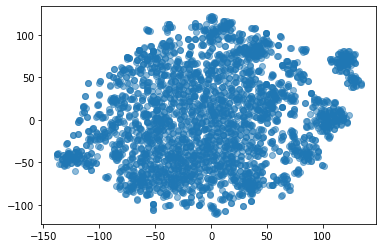

In [ ]:
plt.scatter(threshold95_df['tsne_30_x'], threshold95_df['tsne_30_y'], alpha=.5)

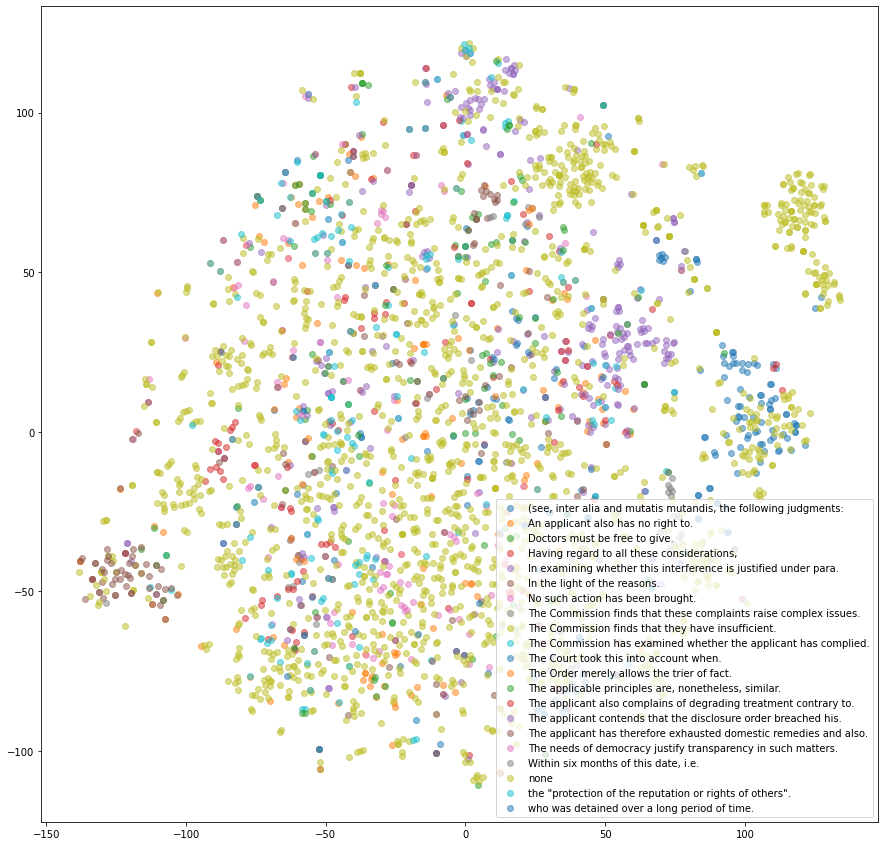

In [ ]:
plt.figure(figsize=(15, 15))
for i,group in threshold95_df.groupby('kp'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

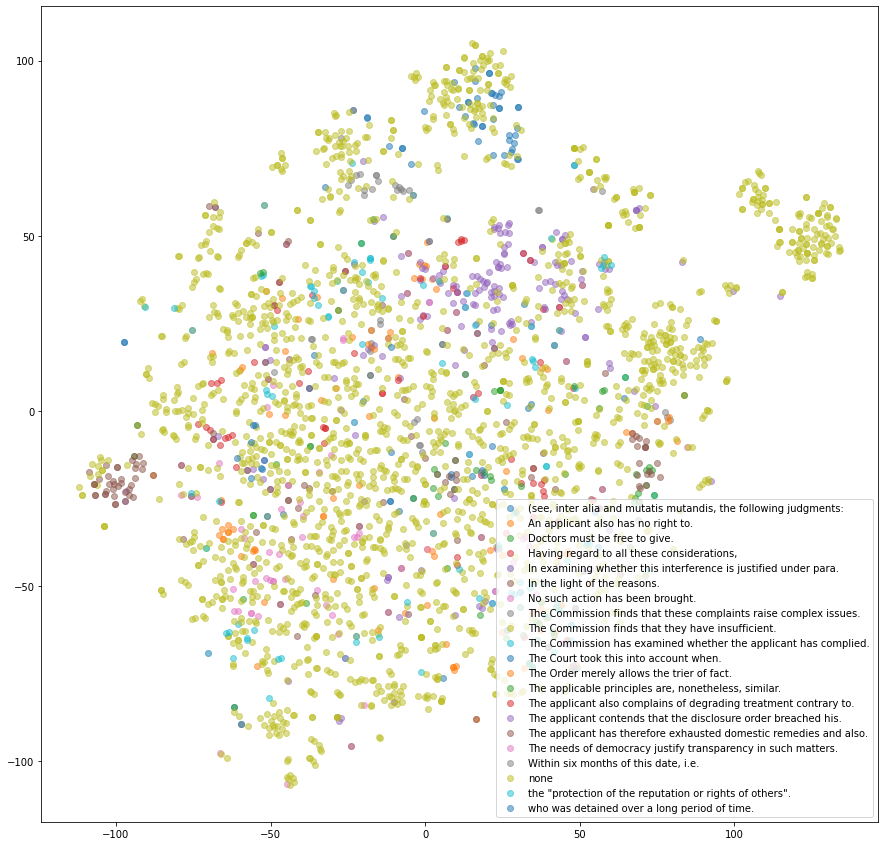

In [ ]:
plt.figure(figsize=(15, 15))
for i,group in threshold99_df.groupby('kp'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

# Clustering

In [ ]:
# embedder = SentenceTransformer('distiluse-base-multilingual-cased-v2')  
def agglomerative_clustering(corpus, n_clusters, distance_threshold):
    corpus_embeddings = corpus['embedding'].tolist()
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold)#affinity='cosine', linkage='average', distance_threshold=0.4)
    clustering_model.fit_predict(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    clustered_sentences = {}
    clustered_embedding = {}
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        if cluster_id not in clustered_sentences:
            clustered_sentences[cluster_id] = []
        clustered_sentences[cluster_id].append(corpus['argument'][sentence_id])
    
    df = pd.DataFrame({"cluster_id": clustered_sentences.keys(), "argument": clustered_sentences.values()})
    return df

In [ ]:
def calc_merged_df(df,clustered_df):
  # sums up previous notebook's unk clustering 
  merged_df = pd.merge(df,clustered_df.explode('argument'),how='left', left_on=['argument'], right_on = ['argument'])
  assert len(df) == len(clustered_df.explode('argument'))
  aux_df = merged_df.groupby(['cluster_id','topic']).count()['arg_id']
  topics = []
  for cluster_id in range(len(clustered_df)):
    topics.append(aux_df[cluster_id][:].idxmax())
  cluster_id_topic_series = pd.Series(index = np.arange(len(clustered_df)), data = topics)
  topic_cluster_id_series = pd.Series(data = np.arange(len(clustered_df)), index = topics)
  return merged_df

# Clustering

In [ ]:
threshold95_df.head(2)

,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279,"[-0.015253644, 0.035371702, 0.008650307, -0.04...",81.446152,82.05600
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247,"[-0.071769476, 0.049743786, -0.06017835, -0.04...",35.842319,-68.64164


In [ ]:
clustered_df = agglomerative_clustering(threshold95_df, n_clusters=21,distance_threshold=None)
clustered_df.head()
# merged_df = calc_merged_df(threshold95_df, clustered_df)

,cluster_id,argument
0,17,[(P7-4) has in any event been complied with as...
1,6,[(b) the lawful arrest or detention of a perso...
2,7,"[(cf.,\n e.g., Eur., (cf., e.g., Eur., (cf., e..."
3,10,[(including the S.A.S soldiers and Security Se...
4,11,[(see Olivier de Schutter's commentary on that...


In [ ]:
merged95_df = pd.merge(threshold95_df,clustered_df.explode('argument'),how='left', left_on=['argument'], right_on = ['argument'])
merged95_df.head()

,kp,argument,match_score,comment_id,sentence_id,sents_in_comment,span_start,span_end,num_tokens,argument_quality,embedding,tsne_30_x,tsne_30_y,cluster_id
0,none,(P7-4) has in any event been complied with as ...,0.0,1395,2,4,58,130,15,0.365279,"[-0.015253644, 0.035371702, 0.008650307, -0.04...",81.446152,82.056000,17
1,none,(b) the lawful arrest or detention of a person...,0.0,142,8,10,364,488,24,0.426247,"[-0.071769476, 0.049743786, -0.06017835, -0.04...",35.842319,-68.641640,6
2,none,"(cf.,\n e.g., Eur.",0.0,1345,0,5,0,17,4,0.297500,"[0.01282976, -0.03242515, -0.0011372472, -0.03...",62.176357,97.282082,7
3,none,"(cf., e.g., Eur.",0.0,1326,0,4,0,16,4,0.297500,"[0.01282976, -0.03242515, -0.0011372472, -0.03...",61.909817,98.189156,7
4,none,"(cf., e.g., Eur.",0.0,1326,0,4,0,16,4,0.297500,"[0.01282976, -0.03242515, -0.0011372472, -0.03...",61.909817,98.189156,7


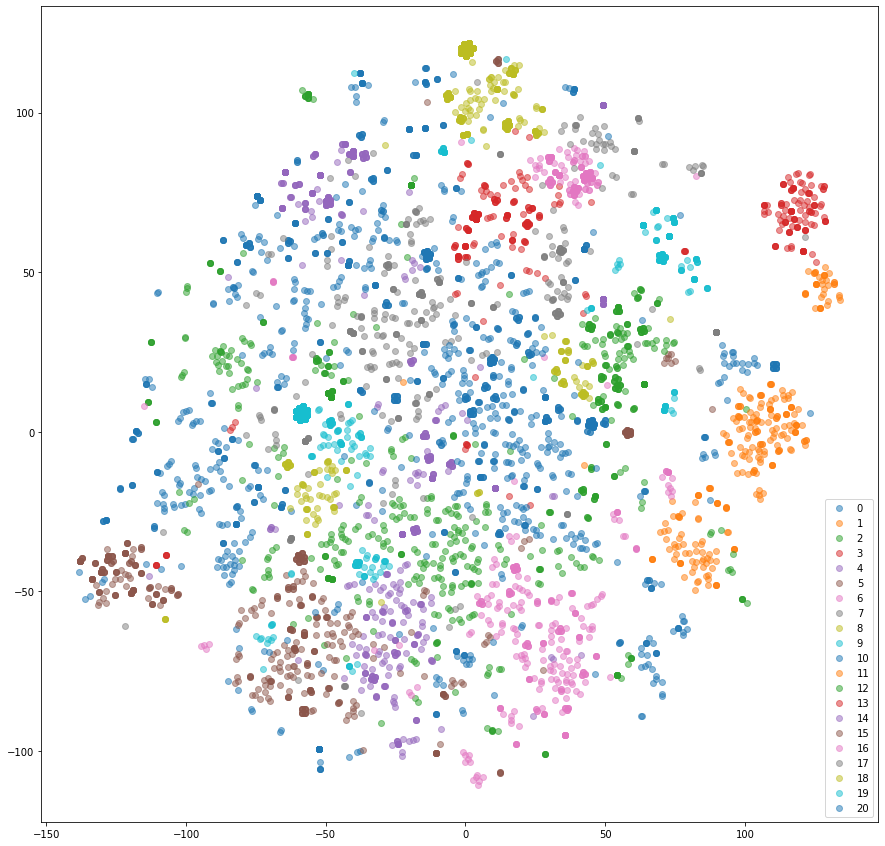

In [ ]:
plt.figure(figsize=(15, 15))
for i,group in merged95_df.groupby('cluster_id'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

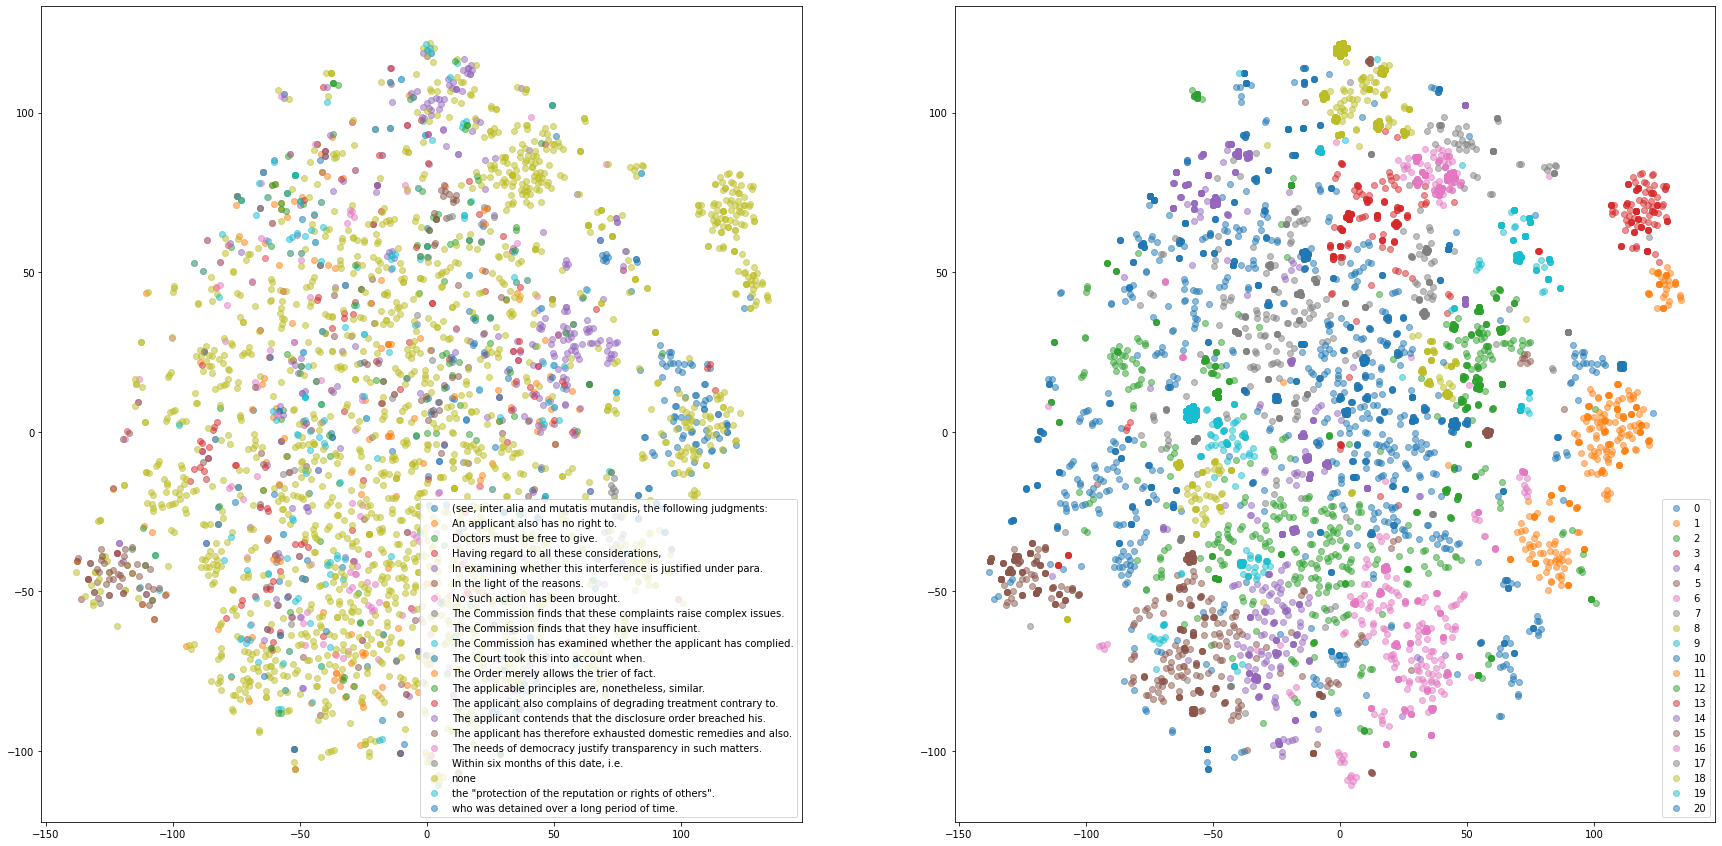

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(30, 15))
for i,group in threshold95_df.groupby('kp'):
  axis[0].scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
axis[0].legend(loc='lower right')

for i,group in merged95_df.groupby('cluster_id'):
  axis[1].scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
axis[1].legend(loc='lower right')